In [5]:
import sys

In [ ]:
!sudo -H {sys.executable} -m pip install pandas

In [6]:
import pandas as pd

In [7]:
df=pd.read_csv('bank_marketing.csv',sep=';')

In [8]:
df.head()

,id,age,job,marital,education,default,housing,loan,contact,month,...,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,subscription
0,0,56,housemaid,married,basic.4y,no,no,no,telephone,may,...,1,999.0,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
1,1,57,services,married,high.school,unknown,no,no,telephone,may,...,1,999.0,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
2,2,37,services,married,high.school,no,yes,no,telephone,may,...,1,999.0,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
3,3,40,admin.,married,basic.6y,no,no,no,telephone,may,...,1,999.0,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
4,4,56,services,married,high.school,no,no,yes,telephone,may,...,1,999.0,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no


In [10]:
df_null_count=df.isnull().sum()

there is one missing value in column pdays

In [11]:
df['pdays'].unique()

array([999.,   4.,   3.,  12.,   6.,  nan,  16.,  10.,  11.,   1.,   9.,
         5.,   2.,  15.,   8.,   7.,  21.,   0.,  14.,  13.,  17.,  18.,
        22.,  19.,  26.,  20.,  25.,  27.])

From the above result , we can see that the data distribution is is drastically varied between both the class labels.

In [12]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 40000 entries, 0 to 39999
Data columns (total 22 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   id              40000 non-null  int64  
 1   age             40000 non-null  int64  
 2   job             40000 non-null  object 
 3   marital         40000 non-null  object 
 4   education       40000 non-null  object 
 5   default         40000 non-null  object 
 6   housing         40000 non-null  object 
 7   loan            40000 non-null  object 
 8   contact         40000 non-null  object 
 9   month           40000 non-null  object 
 10  day_of_week     40000 non-null  object 
 11  duration        40000 non-null  int64  
 12  campaign        40000 non-null  int64  
 13  pdays           39999 non-null  float64
 14  previous        40000 non-null  int64  
 15  poutcome        40000 non-null  object 
 16  emp.var.rate    40000 non-null  float64
 17  cons.price.idx  40000 non-null 

From the analysis and instructions given all the string attributes are categorical

df_copy=df.copy()

In [17]:
df_copy=df.copy()
df_copy.head()

,id,age,job,marital,education,default,housing,loan,contact,month,...,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,subscription
0,0,56,housemaid,married,basic.4y,no,no,no,telephone,may,...,1,999.0,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
1,1,57,services,married,high.school,unknown,no,no,telephone,may,...,1,999.0,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
2,2,37,services,married,high.school,no,yes,no,telephone,may,...,1,999.0,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
3,3,40,admin.,married,basic.6y,no,no,no,telephone,may,...,1,999.0,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
4,4,56,services,married,high.school,no,no,yes,telephone,may,...,1,999.0,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no


In [18]:
df[df.isna().any(axis=1)]

,id,age,job,marital,education,default,housing,loan,contact,month,...,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,subscription
358,358,33,self-employed,married,basic.9y,unknown,no,no,cellular,jul,...,1,NaN,0,nonexistent,1.4,93.918,-42.7,4.963,5228.1,no


df.isnull().sum()

In [35]:
df['pdays'].describe()

count    39999.000000
mean       962.680617
std        186.405346
min          0.000000
25%        999.000000
50%        999.000000
75%        999.000000
max        999.000000
Name: pdays, dtype: float64

In [74]:
df_dropna = df[df['pdays'].notna()]


In [125]:
df_fillna = pd.DataFrame(df_copy.fillna(df_copy['pdays'].mean()))

In [126]:
df_fillna.isnull().sum()

id                0
age               0
job               0
marital           0
education         0
default           0
housing           0
loan              0
contact           0
month             0
day_of_week       0
duration          0
campaign          0
pdays             0
previous          0
poutcome          0
emp.var.rate      0
cons.price.idx    0
cons.conf.idx     0
euribor3m         0
nr.employed       0
subscription      0
dtype: int64

task 1.b

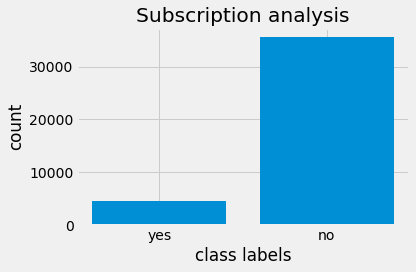

In [107]:
from matplotlib import pyplot as plt
from collections import Counter

plt.style.use("fivethirtyeight")
subscription_responses = df_fillna['subscription']
subscription_counter = Counter()
for response in subscription_responses:
    subscription_counter.update(response.split(';'))

subscription_choices = []
count = []
for item in subscription_counter.most_common(100):
    subscription_choices.append(item[0])
    count.append(item[1])
subscription_choices.reverse()
count.reverse()
plt.bar(subscription_choices, count)
plt.title("Subscription analysis")
plt.ylabel("count")
plt.xlabel("class labels")
plt.tight_layout()
plt.show()

task 2.c

In [97]:
df_fillna.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 40000 entries, 0 to 39999
Data columns (total 22 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   id              40000 non-null  int64  
 1   age             40000 non-null  int64  
 2   job             40000 non-null  object 
 3   marital         40000 non-null  object 
 4   education       40000 non-null  object 
 5   default         40000 non-null  object 
 6   housing         40000 non-null  object 
 7   loan            40000 non-null  object 
 8   contact         40000 non-null  object 
 9   month           40000 non-null  object 
 10  day_of_week     40000 non-null  object 
 11  duration        40000 non-null  int64  
 12  campaign        40000 non-null  int64  
 13  pdays           40000 non-null  float64
 14  previous        40000 non-null  int64  
 15  poutcome        40000 non-null  object 
 16  emp.var.rate    40000 non-null  float64
 17  cons.price.idx  40000 non-null 

In [88]:
import numpy as np


In [103]:
df_categorical=df_fillna.loc[:,df_fillna.dtypes == np.object]
for col in df_categorical:
    print(df_categorical[col].unique())

['housemaid' 'services' 'admin.' 'retired' 'blue-collar' 'technician'
 'self-employed' 'management' 'entrepreneur' 'student' 'unknown'
 'unemployed']
['married' 'single' 'divorced' 'unknown']
['basic.4y' 'high.school' 'basic.6y' 'basic.9y' 'university.degree'
 'professional.course' 'unknown' 'illiterate']
['no' 'unknown' 'yes']
['no' 'yes' 'unknown']
['no' 'yes' 'unknown']
['telephone' 'cellular']
['may' 'jun' 'jul' 'aug' 'nov' 'apr' 'sep' 'oct' 'mar' 'dec']
['mon' 'fri' 'thu' 'tue' 'wed']
['nonexistent' 'failure' 'success']
['no' 'yes']


/var/folders/d1/hj61c16j11qc7w88b5dtvy7m0000gn/T/ipykernel_16888/3732446728.py:1: DeprecationWarning: `np.object` is a deprecated alias for the builtin `object`. To silence this warning, use `object` by itself. Doing this will not modify any behavior and is safe. 
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  df_categorical=df_fillna.loc[:,df_fillna.dtypes == np.object]


In [104]:
df_categorical.columns

Index(['job', 'marital', 'education', 'default', 'housing', 'loan', 'contact',
       'month', 'day_of_week', 'poutcome', 'subscription'],
      dtype='object')

In [106]:
from scipy import stats
(chi2_job,p,dof,_) = stats.chi2_contingency(pd.crosstab(index=df['job'],columns=df['subscription']).values)
(chi2_marital,p,dof,_) = stats.chi2_contingency(pd.crosstab(index=df['marital'],columns=df['subscription']).values)
(chi2_education,p,dof,_) = stats.chi2_contingency(pd.crosstab(index=df['education'],columns=df['subscription']).values)
(chi2_default,p,dof,_) = stats.chi2_contingency(pd.crosstab(index=df['default'],columns=df['subscription']).values)
(chi2_housing,p,dof,_) = stats.chi2_contingency(pd.crosstab(index=df['housing'],columns=df['subscription']).values)
(chi2_loan,p,dof,_) = stats.chi2_contingency(pd.crosstab(index=df['loan'],columns=df['subscription']).values)
(chi2_contact,p,dof,_) = stats.chi2_contingency(pd.crosstab(index=df['contact'],columns=df['subscription']).values)
(chi2_month,p,dof,_) = stats.chi2_contingency(pd.crosstab(index=df['month'],columns=df['subscription']).values)
(chi2_day_of_week,p,dof,_) = stats.chi2_contingency(pd.crosstab(index=df['day_of_week'],columns=df['subscription']).values)
(chi2_poutcome,p,dof,_) = stats.chi2_contingency(pd.crosstab(index=df['poutcome'],columns=df['subscription']).values)

print("feature attribute         chi-squared value")
print("job               ",chi2_job)
print("marital           ",chi2_marital)
print("education         ",chi2_education)
print("default           ",chi2_default)
print("housing           ",chi2_housing)
print("loan              ",chi2_loan)
print("contact           ",chi2_contact)
print("month             ",chi2_month)
print("day_of_week       ",chi2_day_of_week)
print("poutcome          ",chi2_poutcome)

feature attribute         chi-squared value
job                920.307103074125
marital            121.44647351660834
education          184.5089183431896
default            395.90378070839677
housing            4.886373967085471
loan               0.40057145046718035
contact            836.6239582862397
month              3017.769736182542
day_of_week        23.52665715403947
poutcome           4094.545532872977


In [232]:
Chi2_df=pd.DataFrame(data=np.array([['job',chi2_job],
                                           ['marital',chi2_marital],
                                           ['education',chi2_education],
                                           ['default',chi2_default],
                                           ['housing',chi2_housing],
                                           ['loan',chi2_loan],
                                           ['contact',chi2_contact],
                                           ['month',chi2_month],
                                           ['day_of_week',chi2_day_of_week],
                                           ['poutcome',chi2_poutcome]]),columns=['Feature','Chi2'])

In [235]:
Chi2_df['Chi2'] = Chi2_df['Chi2'].astype(float)
Chi2_df.sort_values(by=['Chi2'], ascending=True)

,Feature,Chi2
5,loan,0.400571
4,housing,4.886374
8,day_of_week,23.526657
1,marital,121.446474
2,education,184.508918
3,default,395.903781
6,contact,836.623958
0,job,920.307103
7,month,3017.769736
9,poutcome,4094.545533


In [242]:
norm_df=df_fillna.copy()
norm_df['age_new']=pd.cut(df_fillna['age'], bins=[10,20,30,40,50,60,70,80,90,100],labels=[1,2,3,4,5,6,7,8,9])
norm_df['duration_new']=pd.cut(df_fillna['duration'], bins=[-1,1000,2000,3000,4000,5000],labels=[1,2,3,4,5])
norm_df['campaign_new']=pd.cut(df_fillna['campaign'], bins=[0,10,20,30,40,50,60],labels=[1,2,3,4,5,6])
norm_df['pdays_new']=pd.cut(df_fillna['pdays'],  bins=[-1,100,200,300,400,500,600,700,800,900,1000],labels=[1,2,3,4,5,6,7,8,9,10])
norm_df['previous_new']=pd.cut(df_fillna['previous'],  bins=[-1,1,2,3,4,5,6,7,8],labels=[1,2,3,4,5,6,7,8])
norm_df['emp.var.rate_new']=pd.cut(df_fillna['emp.var.rate'],  bins=[-4,-3,-2,-1,0,1,2],labels=[1,2,3,4,5,6])
norm_df['cons.price.idx_new']=pd.cut(df_fillna['cons.price.idx'],  bins=[92,93,94,95],labels=[1,2,3])
norm_df['cons.conf.idx_new']=pd.cut(df_fillna['cons.conf.idx'],  bins=[-51,-41,-31,-21],labels=[1,2,3])
norm_df['euribor3m_new']=pd.cut(df_fillna['euribor3m'],  bins=[0,1,2,3,4,5,6],labels=[1,2,3,4,5,6])
norm_df['nr.employed_new']=pd.cut(df_fillna['nr.employed'],  bins=[4900,5000,5100,5200,5300],labels=[1,2,3,4])

In [250]:
norm_df['euribor3m'].describe()

count    40000.000000
mean         3.620732
std          1.734395
min          0.634000
25%          1.344000
50%          4.857000
75%          4.961000
max          5.045000
Name: euribor3m, dtype: float64

In [243]:
norm_df.columns

Index(['id', 'age', 'job', 'marital', 'education', 'default', 'housing',
       'loan', 'contact', 'month', 'day_of_week', 'duration', 'campaign',
       'pdays', 'previous', 'poutcome', 'emp.var.rate', 'cons.price.idx',
       'cons.conf.idx', 'euribor3m', 'nr.employed', 'subscription', 'age_new',
       'duration_new', 'campaign_new', 'pdays_new', 'previous_new',
       'emp.var.rate_new', 'cons.price.idx_new', 'cons.conf.idx_new',
       'euribor3m_new', 'nr.employed_new'],
      dtype='object')

In [244]:
from sklearn.preprocessing import LabelEncoder 
import sklearn
from sklearn.feature_selection import mutual_info_classif

In [245]:
labelencoder=LabelEncoder()
A=np.array(norm_df['age_new'])
B=np.array(norm_df['duration_new'])
C=np.array(norm_df['campaign_new'])
D=np.array(norm_df['pdays_new'])
E=np.array(norm_df['previous_new'])
F=np.array(norm_df['emp.var.rate_new'])
G=np.array(norm_df['cons.price.idx_new'])
H=np.array(norm_df['cons.conf.idx_new'])
I=np.array(norm_df['euribor3m_new'])
J=np.array(norm_df['nr.employed_new'])

P=np.array(labelencoder.fit_transform(norm_df['subscription']))

MutualI_age=mutual_info_classif(A.reshape(-1,1),P,discrete_features=True)
MutualI_duration=mutual_info_classif(B.reshape(-1,1),P,discrete_features=True)
MutualI_campaign=mutual_info_classif(C.reshape(-1,1),P,discrete_features=True)
MutualI_pdays=mutual_info_classif(D.reshape(-1,1),P,discrete_features=True)
MutualI_previous=mutual_info_classif(E.reshape(-1,1),P,discrete_features=True)
MutualI_emp_var_rate=mutual_info_classif(F.reshape(-1,1),P,discrete_features=True)
MutualI_cons_price_idx=mutual_info_classif(G.reshape(-1,1),P,discrete_features=True)
MutualI_cons_conf_idx=mutual_info_classif(H.reshape(-1,1),P,discrete_features=True)
MutualI_euribor3m=mutual_info_classif(I.reshape(-1,1),P,discrete_features=True)
MutualI_nr_employed=mutual_info_classif(J.reshape(-1,1),P,discrete_features=True)


In [246]:
Mutual_Info_df=pd.DataFrame(data=np.array([['age',MutualI_age],
                                           ['duration',MutualI_duration],
                                           ['campaign',MutualI_campaign],
                                           ['pdays',MutualI_pdays],
                                           ['previous',MutualI_previous],
                                           ['emp_var_rate',MutualI_emp_var_rate],
                                           ['cons_price_idx',MutualI_cons_price_idx],
                                           ['cons_conf_idx',MutualI_cons_conf_idx],
                                           ['euribor3m',MutualI_euribor3m],
                                           ['nr_employed',MutualI_nr_employed]]),columns=['Feature','Mutual_Info'])

/var/folders/d1/hj61c16j11qc7w88b5dtvy7m0000gn/T/ipykernel_16888/2783604907.py:1: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  Mutual_Info_df=pd.DataFrame(data=np.array([['age',MutualI_age],


In [247]:
Mutual_Info_df.head(10)

,Feature,Mutual_Info
0,age,[0.011915973421869563]
1,duration,[0.016234063765584294]
2,campaign,[0.001021119699794365]
3,pdays,[0.03087566188805968]
4,previous,[0.012407471459780176]
5,emp_var_rate,[0.04471264255923449]
6,cons_price_idx,[0.013132086180079092]
7,cons_conf_idx,[0.011127856029028993]
8,euribor3m,[0.05503166762654602]
9,nr_employed,[0.045187292168957]


In [248]:
Mutual_Info_df['Mutual_Info'] =Mutual_Info_df['Mutual_Info'].astype(float)
Mutual_Info_df.sort_values(by=['Mutual_Info'], ascending=True)

,Feature,Mutual_Info
2,campaign,0.001021
7,cons_conf_idx,0.011128
0,age,0.011916
4,previous,0.012407
6,cons_price_idx,0.013132
1,duration,0.016234
3,pdays,0.030876
5,emp_var_rate,0.044713
9,nr_employed,0.045187
8,euribor3m,0.055032


In [2]:
import matplotlib.pyplot as plt


subscription_no = df_fillna[df_fillna.subscription == 'no']
subscription_yes = df_fillna[df_fillna.subscription == 'yes']


subscription_no.hist(column = 'age', bins = 10, color = 'teal', \
           alpha = 0.5)
subscription_yes.hist(column = 'age', bins = 10, color = 'blue', \
            alpha = 0.5)
plt.hist([subscription_no.hist(column = 'age', bins = 10, color = 'teal', \
           alpha = 0.5), subscription_yes.hist(column = 'age', bins = 10, color = 'blue', \
            alpha = 0.5)])
plt.show()

NameError: name 'df_fillna' is not defined

In [62]:
import matplotlib.pyplot as plt
import seaborn as sb
fig=plt.gcf()
fig.set_size_inches(30,6)
#plt.subplot(1,2,1)
#sb.countplot('marital',hue='subscription',data=df_fillna)

<Figure size 2160x432 with 0 Axes>

<AxesSubplot:xlabel='campaign', ylabel='Count'>

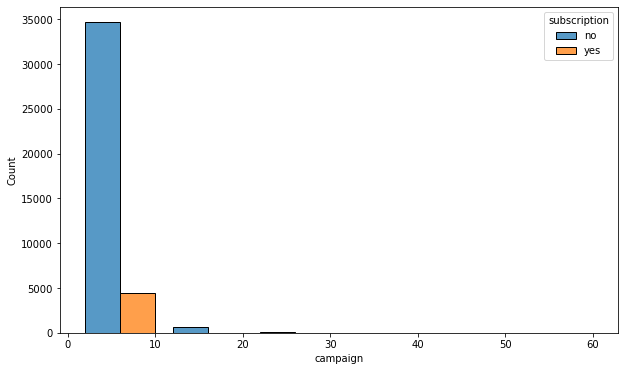

In [65]:
fig=plt.gcf()
fig.set_size_inches(10,6)
sb.histplot(data=df_fillna, x="campaign", binwidth=10,multiple="dodge",hue='subscription',shrink=0.8)

<AxesSubplot:xlabel='cons.conf.idx', ylabel='Count'>

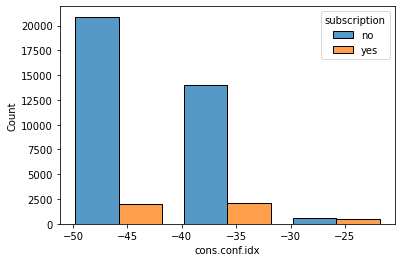

In [59]:
sb.histplot(data=df_fillna, x="cons.conf.idx", binwidth=10,multiple="dodge",hue='subscription',shrink=0.8)

<AxesSubplot:xlabel='age', ylabel='Count'>

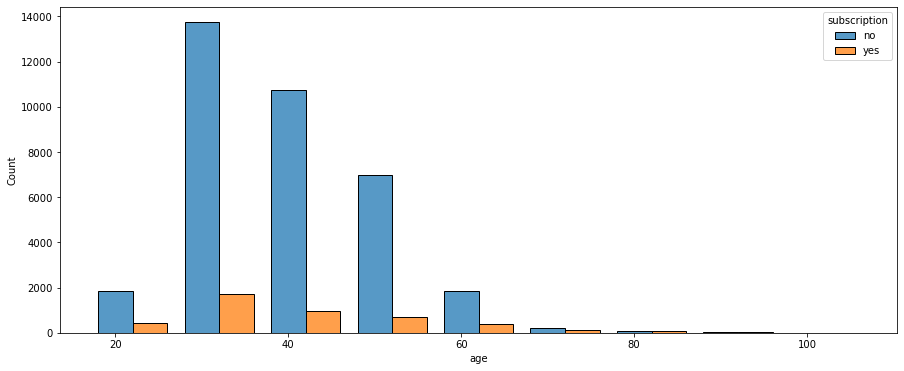

In [92]:
fig=plt.gcf()
fig.set_size_inches(15,6)
sb.histplot(data=df_fillna, x="age", binwidth=10,multiple="dodge",hue='subscription',shrink=0.8)

<AxesSubplot:xlabel='emp.var.rate', ylabel='Count'>

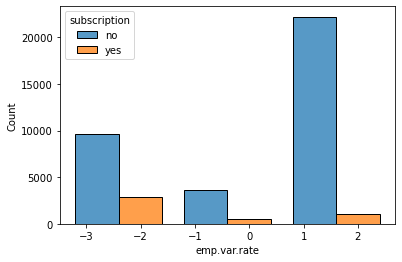

In [75]:
sb.histplot(data=df_fillna, x="emp.var.rate", binwidth=2,multiple="dodge",hue='subscription',shrink=0.8)

<AxesSubplot:xlabel='nr.employed', ylabel='Count'>

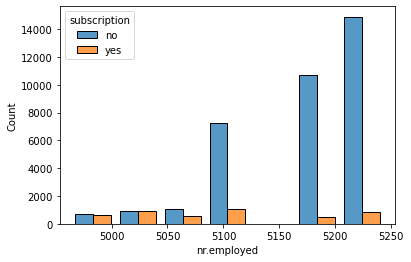

In [76]:
sb.histplot(data=df_fillna, x="nr.employed", binwidth=40,multiple="dodge",hue='subscription',shrink=0.8)

<AxesSubplot:xlabel='euribor3m', ylabel='Count'>

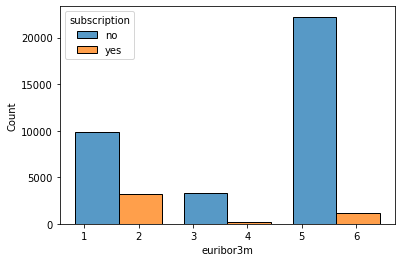

In [71]:
sb.histplot(data=df_fillna, x="euribor3m", binwidth=2,multiple="dodge",hue='subscription',shrink=0.8)

<AxesSubplot:xlabel='loan', ylabel='Count'>

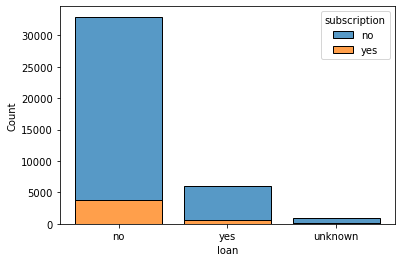

In [78]:
sb.histplot(data=df_fillna, x="loan", binwidth=2,multiple="stack",hue='subscription',shrink=0.8)

<AxesSubplot:xlabel='housing', ylabel='Count'>

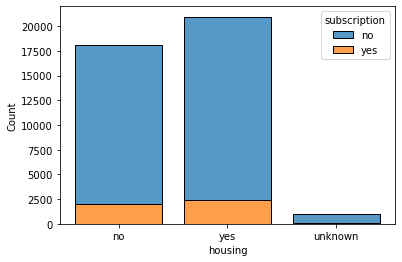

In [79]:
sb.histplot(data=df_fillna, x="housing", binwidth=2,multiple="stack",hue='subscription',shrink=0.8)

<AxesSubplot:xlabel='day_of_week', ylabel='Count'>

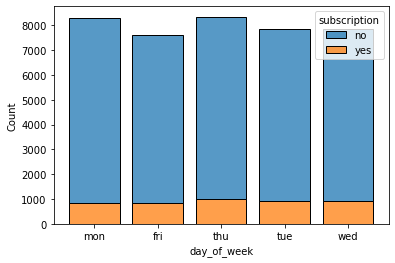

In [81]:
sb.histplot(data=df_fillna, x="day_of_week", binwidth=2,multiple="stack",hue='subscription',shrink=0.8)

<AxesSubplot:xlabel='job', ylabel='Count'>

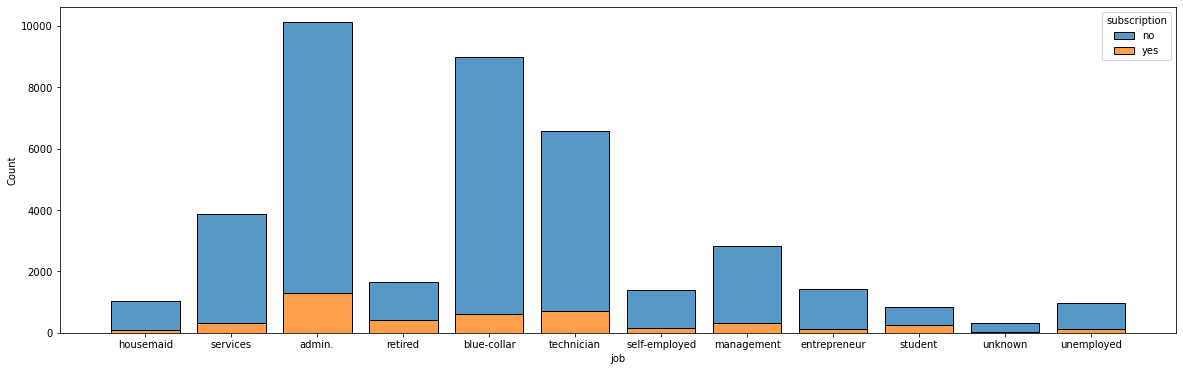

In [83]:
fig=plt.gcf()
fig.set_size_inches(20,6)
sb.histplot(data=df_fillna, x="job", binwidth=2,multiple="stack",hue='subscription',shrink=0.8)

<AxesSubplot:xlabel='month', ylabel='Count'>

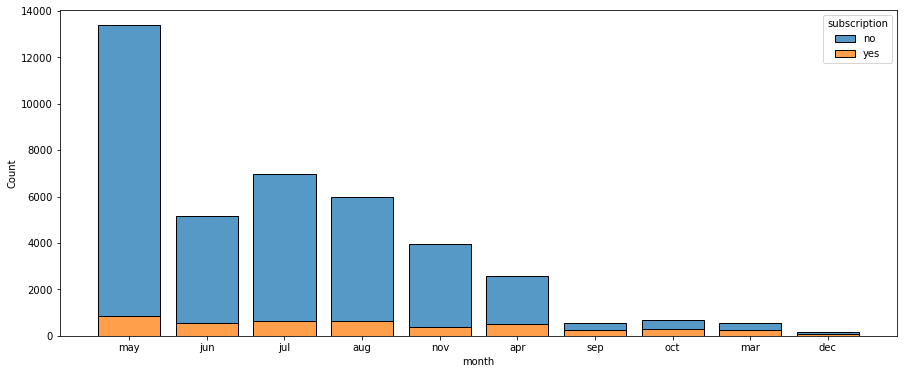

In [85]:
fig=plt.gcf()
fig.set_size_inches(15,6)
sb.histplot(data=df_fillna, x="month", binwidth=2,multiple="stack",hue='subscription',shrink=0.8)

<AxesSubplot:xlabel='poutcome', ylabel='Count'>

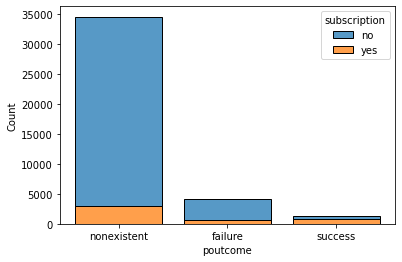

In [90]:
sb.histplot(data=df_fillna, x="poutcome", binwidth=2,multiple="stack",hue='subscription',shrink=0.8)

In [116]:
from sklearn.preprocessing import LabelBinarizer as lb

def min_max_scaled(df_min_max_scaled,column):
  df_min_max_scaled[column] = (df_min_max_scaled[column] - df_min_max_scaled[column].min()) / (df_min_max_scaled[column].max() - df_min_max_scaled[column].min())    

for col in df_fillna.columns:
  if df_fillna[col].dtype in ('int64','float64'):
      min_max_scaled(df_fillna,col)

##df_min_max_scaled -- new copy lo data update chesa, vaddu ante 'df_min_max_scaled' -> 'df' tho replace chesey
df_fillna.head(10)
print("attribute    original max  original min  normalized max  normalized min")
print("duration         ",df_copy.duration.max(),"        ",df_copy.duration.min(),"           ",df_fillna.duration.max(),"        ",df_fillna.duration.min())
print("campaign         ",df_copy.campaign.max(),"          ",df_copy.campaign.min(),"           ",df_fillna.campaign.max(),"        ",df_fillna.campaign.min())
print("previous         ",df_copy.previous.max(),"           ",df_copy.previous.min(),"           ",df_fillna.previous.max(),"        ",df_fillna.previous.min())
print("emp_var_rate     ",df_copy['emp.var.rate'].max(),"        ",df_copy['emp.var.rate'].min(),"         ",df_fillna['emp.var.rate'].max(),"        ",df_fillna['emp.var.rate'].min())
print("pdays            ",df_copy.pdays.max(),"       ",df_copy.pdays.min(),"         ",df_fillna.pdays.max(),"        ",df_fillna.pdays.min())
print("cons_price_idx   ",df_copy['cons.price.idx'].max(),"      ",df_copy['cons.price.idx'].min(),"        ",df_fillna['cons.price.idx'].max(),"        ",df_fillna['cons.price.idx'].min())
print("cons_conf_idx    ",df_copy['cons.conf.idx'].max(),"       ",df_copy['cons.conf.idx'].min(),"         ",df_fillna['cons.conf.idx'].max(),"        ",df_fillna['cons.conf.idx'].min())
print("age              ",df_copy.age.max(),"          ",df_copy.age.min(),"           ",df_fillna.age.max(),"        ",df_fillna.age.min())
print("euribor3m        ",df_copy.euribor3m.max(),"       ",df_copy.euribor3m.min(),"         ",df_fillna.euribor3m.max(),"        ",df_fillna.euribor3m.min())
print("nr.employed      ",df_copy['nr.employed'].max(),"      ",df_copy['nr.employed'].min(),"         ",df_fillna['nr.employed'].max(),"        ",df_fillna['nr.employed'].min())

attribute    original max  original min  normalized max  normalized min
duration          4918          0             1.0          0.0
campaign          56            1             1.0          0.0
previous          7             0             1.0          0.0
emp_var_rate      1.4          -3.4           1.0          0.0
pdays             999.0         0.0           1.0          0.0
cons_price_idx    94.767        92.201          1.0          0.0
cons_conf_idx     -26.9         -50.8           1.0          0.0
age               98            17             1.0          0.0
euribor3m         5.045         0.634           1.0          0.0
nr.employed       5228.1        4963.6           1.0          0.0


In [118]:
for col in df_copy:
  if df_copy[col].dtype=='object': 
    y = pd.get_dummies(df_copy[col], prefix=col)
    for i in y.columns:
      # print(i)
      index = pd.Index(y[i])
      # print(index.value_counts())
      print(i,index.value_counts()[1])

job_admin. 10119
job_blue-collar 8980
job_entrepreneur 1423
job_housemaid 1025
job_management 2837
job_retired 1668
job_self-employed 1380
job_services 3857
job_student 855
job_technician 6560
job_unemployed 981
job_unknown 315
marital_divorced 4482
marital_married 24214
marital_single 11225
marital_unknown 79
education_basic.4y 4058
education_basic.6y 2235
education_basic.9y 5877
education_high.school 9222
education_illiterate 18
education_professional.course 5091
education_university.degree 11819
education_unknown 1680
default_no 31653
default_unknown 8344
default_yes 3
housing_no 18080
housing_unknown 960
housing_yes 20960
loan_no 32970
loan_unknown 960
loan_yes 6070
contact_cellular 25377
contact_telephone 14623
month_apr 2570
month_aug 6000
month_dec 180
month_jul 6956
month_jun 5172
month_mar 533
month_may 13384
month_nov 3955
month_oct 696
month_sep 554
day_of_week_fri 7617
day_of_week_mon 8285
day_of_week_thu 8350
day_of_week_tue 7871
day_of_week_wed 7877
poutcome_failure 4147


In [124]:
from scipy.stats import pearsonr
corre,_=pearsonr(df_copy['age'],df_copy['marital'])
print(corre)

UFuncTypeError: ufunc 'add' did not contain a loop with signature matching types (dtype('<U32'), dtype('<U32')) -> dtype('<U32')